<a href="https://colab.research.google.com/github/Edersao/Atmosf-ricos/blob/main/gr%C3%A1ficas_precipitaci%C3%B3n_Ixil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Gráficas de precipitación

Descarga de paqueterias que se utilizarán

In [239]:
!pip install netCDF4
!pip install basemap
!pip install datetime

Importamos paqueterias necesarias para las graficsa y manipulación de los datos NetCDF

In [240]:
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
from datetime import datetime, timedelta
import os
from netCDF4 import Dataset
import numpy as np
import glob
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

Pruebas para realizar función de gráficas. Empezamos con lectura de archivo. En teória los datos ya deben entrar en la función

In [241]:
ds = xr.open_dataset('/content/drive/MyDrive/atmos/datos/Ixil/Ixil/Precipitacion/g4.timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120101-20120131.90W_18N_86W_22N.nc')

exploración del archivo

In [242]:
ds[list(ds.keys())[0]]

<xarray.DataArray 'TRMM_3B42_Daily_7_precipitation' (lat: 15, lon: 15)>
[225 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 18.38 18.62 18.88 19.12 ... 21.12 21.38 21.62 21.88
  * lon      (lon) float32 -90.38 -90.12 -89.88 -89.62 ... -87.38 -87.12 -86.88
Attributes:
    fullnamepath:          /precipitation
    long_name:             Precipitation Rate
    origname:              precipitation
    product_short_name:    TRMM_3B42_Daily
    product_version:       7
    quantity_type:         Precipitation
    standard_name:         precipitation
    units:                 mm/day
    cell_methods:          time: mean
    latitude_resolution:   0.25
    longitude_resolution:  0.25

In [243]:
ds.attrs

{'NCO': 'netCDF Operators version 5.0.6 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)',
 'nco_openmp_thread_number': 1,
 'Conventions': 'CF-1.4',
 'start_time': '2012-01-01T01:30:00Z',
 'end_time': '2012-02-01T01:29:59Z',
 'history': 'Fri Nov 24 15:18:48 2023: ncks -O -x -v time_bnds timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120101-20120131.90W_18N_86W_22N.nc timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120101-20120131.90W_18N_86W_22N.nc\nFri Nov 24 15:18:48 2023: ncatted -a valid_range,,d,, -O -o timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120101-20120131.90W_18N_86W_22N.nc timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120101-20120131.90W_18N_86W_22N.nc\nFri Nov 24 15:18:48 2023: ncatted -O -a title,global,o,c,TRMM_3B42_Daily_7_precipitation Averaged over 2012-01-01 to 2012-01-31 timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120101-20120131.90W_18N_86W_22N.nc\nFri Nov 24 15:18:48 2023: ncks -x -v time -o timeAvgMap.TRMM_3B42_Daily_7_precipitation.20120101-20120131

# Descargando y procesando datos .nc

In [244]:


#df_ixil = pd.DataFrame(columns=['Fecha', 'Precipitacion_promedio'])
os.chdir("/content/drive/MyDrive/atmos/datos/Ixil/Ixil/Precipitacion")
archivos = sorted(glob.glob('g4.timeAvgMap.*.nc'))

key_error = []
os_error = []
runtime_error = []

idx = pd.DatetimeIndex([""])
df_ixil=pd.DataFrame(columns=['Precipitacion_promedio'],index=idx)

In [245]:
ix_lat = 21.1522
ix_lon = -89.4822
pp=[]
f=[]
for arch in archivos:
    try:
        print(arch)
        data = xr.open_dataset(arch)
        fecha = datetime.strptime(data.attrs['start_time'], '%Y-%m-%dT%H:%M:%SZ')
        date_formatted = datetime.strftime(fecha,'%d %b %Y')
        #avg_prec = data.TRMM_3B42_Daily_7_precipitation[:]
        avg_prec=data[list(data.keys())[0]]


        nn=avg_prec.sel(lat=[ix_lat-.25, ix_lat+.25],lon=[ix_lon-.25,ix_lon+.25], method="nearest")
        nn=np.mean(nn.data)
        pp.append(nn)
        f.append(fecha)
        #df1=pd.DataFrame(({"Precipitacion_promedio": avg_prec}),index=pd.DatetimeIndex([date_formatted]))
        #df_ixil = df_ixil.append(df1)
    except KeyError:
        key_error.append(arch)
    except OSError:
        os_error.append(arch)
    except RuntimeError:
        runtime_error.append(arch)

g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200101-20200131.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200201-20200229.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200301-20200331.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200401-20200430.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200501-20200531.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200601-20200630.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200701-20200731.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200801-20200831.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20200901-20200930.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20201001-20201031.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20201101-20201130.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_precip.20201201-20201231.90W_18N_86W_22N.nc
g4.timeAvgMap.GPCPMON_3_2_satellite_prec

In [246]:
#idx = pd.DatetimeIndex([""])
df_ixil=pd.DataFrame({'Precipitacion Ixil':pp,'Fecha':f})
df_ixil.head()

,Precipitacion Ixil,Fecha
0,0.207690,2020-01-01
1,0.111609,2020-02-01
2,0.520727,2020-03-01
3,1.346565,2020-04-01
4,4.005889,2020-05-01


Extraemos los datos de la región de Ixil

In [247]:
#coordenadas de Ixil:
#yi=((54/60)+8)/60+21
#xi=((53/60)+28)/60+89
ix_lat = 21.1522
ix_lon = -89.4822
data=ds.TRMM_3B42_Daily_7_precipitation[:]
nn=data.sel(lat=[ix_lat-.25, ix_lat+.25],lon=[ix_lon-.25,ix_lon+.25], method="nearest")
Ixil=np.mean(nn.data)

# Serie de tiempo de la precipitación en Ixil (2012-2023)

In [248]:
df=df_ixil.groupby([df_ixil['Fecha'].dt.year, df_ixil['Fecha'].dt.month],group_keys=True).apply(lambda x: x)

Text(0.5, 1.0, 'Serie de tiempo de la precipitación sobre Ixil')

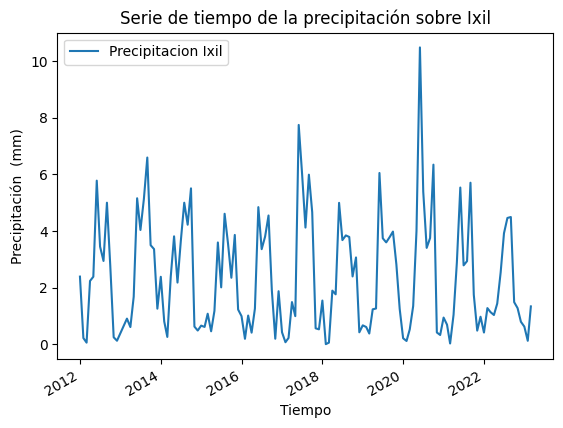

In [249]:
df.plot.line(x='Fecha',y='Precipitacion Ixil')
plt.ylabel('Precipitación  (mm)')
plt.xlabel('Tiempo')
plt.title('Serie de tiempo de la precipitación sobre Ixil')

# Precipitación promedio mensual en Ixil

In [250]:
dfm=df_ixil.groupby([ df_ixil['Fecha'].dt.month],group_keys=False).mean()
dfm=dfm.rename(columns={'Precipitacion Ixil': 'Precipitación mensual'})
dfm['Precipitación 2020']=df['Precipitacion Ixil'].loc[2020,:,:].droplevel(level=1)

<ipython-input-250-4dad0fd4a303>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm=df_ixil.groupby([ df_ixil['Fecha'].dt.month],group_keys=False).mean()


Text(0.5, 1.0, 'Precipitación mensual promedio en Ixil (2012-2023)')

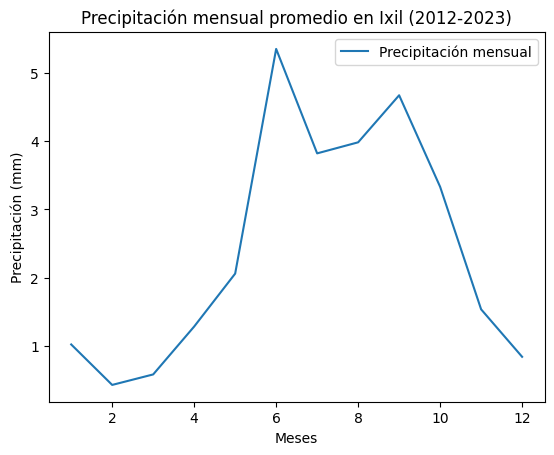

In [251]:
dfm['Precipitación mensual'].plot.line()
plt.legend()
plt.ylabel('Precipitación (mm)')
plt.xlabel('Meses')
plt.title('Precipitación mensual promedio en Ixil (2012-2023)')

# Gráfica 2020 vs promedio

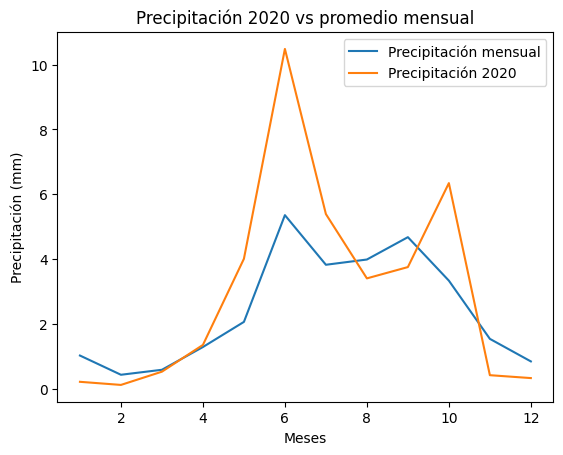

In [252]:

dfm.plot.line()
plt.ylabel('Precipitación (mm)')
plt.xlabel('Meses')
plt.title('Precipitación 2020 vs promedio mensual')

plt.show()

# Gráfica con todos los años vs promedio

In [253]:
l=list(df.index.droplevel(level=[1,2]).unique()[:])

In [254]:
#d=pd.DataFrame(columns=['Precipitacion','Precipitación promedio'])
#dfm=dfm['Precipitación mensual']
for i in l:
  dfm['Precipitación '+str(i)]=df['Precipitacion Ixil'].loc[int(i),:,:].droplevel(level=1)
  #pd.concat([d,df['Precipitacion Ixil'].loc[l,:,:].droplevel(level=1),dfm['Precipitacion Ixil']],ignore_index=True)

In [255]:
dfm.head(5)

,Precipitación mensual,Precipitación 2020,Precipitación 2012,Precipitación 2013,Precipitación 2014,Precipitación 2015,Precipitación 2016,Precipitación 2017,Precipitación 2018,Precipitación 2019,Precipitación 2021,Precipitación 2022,Precipitación 2023
Fecha,,,,,,,,,,,,,
1,1.018785,0.207690,2.386240,NaN,2.379932,0.654596,0.988595,0.418339,1.539474,0.663867,0.938583,0.409648,0.619676
2,0.425244,0.111609,0.214608,NaN,0.801742,0.607937,0.188584,0.067398,0.000000,0.605486,0.688171,1.273397,0.118749
3,0.579152,0.520727,0.052694,0.901801,0.254896,1.074924,1.009600,0.218779,0.052839,0.374623,0.023663,1.131932,1.333349
4,1.281730,1.346565,2.232222,0.603688,2.386758,0.453415,0.406230,1.485329,1.890720,1.230097,1.034827,1.029184,NaN
5,2.057562,4.005889,2.382078,1.674090,3.809391,1.175298,1.257658,0.989349,1.759716,1.259393,2.884914,1.435408,NaN


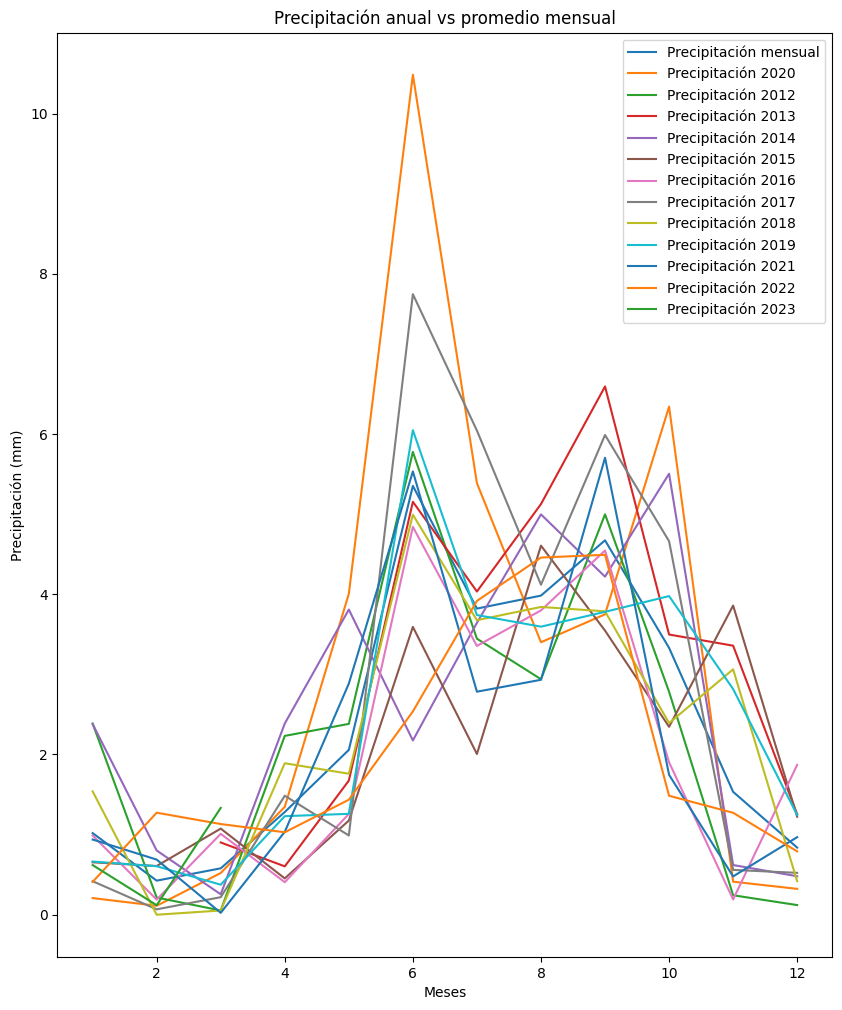

In [256]:
dfm.plot.line(figsize=(10,12))
plt.ylabel('Precipitación (mm)')
plt.xlabel('Meses')
plt.title('Precipitación anual vs promedio mensual')

plt.show()

# Otra cosa

Gráficas mensuales:

In [257]:
def mensual(df,var,unit):
  ix_lat = 21.1522
  ix_lon = -89.4822
  df=df.groupby([df.dt.month]).mean()
  data=df[var]
  lat=df['lat']
  lon=df['lon']
  unit=unidad

  m = Basemap(projection='merc',llcrnrlat=18.375,urcrnrlat=21.875,\
            llcrnrlon=-90.375,urcrnrlon=-86.875,lat_ts=10,resolution = 'i')
  m.drawcoastlines()
  my_cmap=plt.cm.get_cmap('gist_rainbow')
  my_cmap.set_under('w')
  x0, y0 = m(ix_lon, ix_lat)
  x, y = m(lon, lat)
  m.plot(x0, y0, 'ok', markersize=5,color='w')
  m.pcolormesh(x,y, data)
  #m.text(x0, y0, ' Ixil', fontsize=12);
  cb = m.colorbar()
  cb.set_label(unidad)
  plt.text(x0, y0, ' Ixil', fontsize=12, color='w');
  plt.title('Precipitación mensual promedio')
  plt.show()

In [258]:
def graficas_ixil(pp,ix_lat = 21.1522,ix_lon = -89.4822):
  import seaborn as sns
  import matplotlib.pyplot as plt
  Ix=pp['Precipitacion Ixil']
  fecha=pp['Fecha']
  # Crear una figura y ejes para los subplots
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
  # Crear los subplots utilizando Seaborn
  sns.scatterplot(x=fecha, y=Ix, ax=axes[0, 0])
  sns.boxplot(x=fecha, y=Ix, ax=axes[0, 1])
  sns.histplot(Ix, ax=axes[1, 0])
  sns.kdeplot(Ix, ax=axes[1, 1])
  # Añadir títulos y etiquetas a los subplots
  axes[0, 0].set_title('Scatterplot')
  axes[0, 1].set_title('Boxplot')
  axes[1, 0].set_title('Histograma')
  axes[1, 1].set_title('Kernel Density Estimation')
  # Ajustar el espaciado entre los subplots
  plt.tight_layout()
  # Mostrar los subplots
  plt.show()


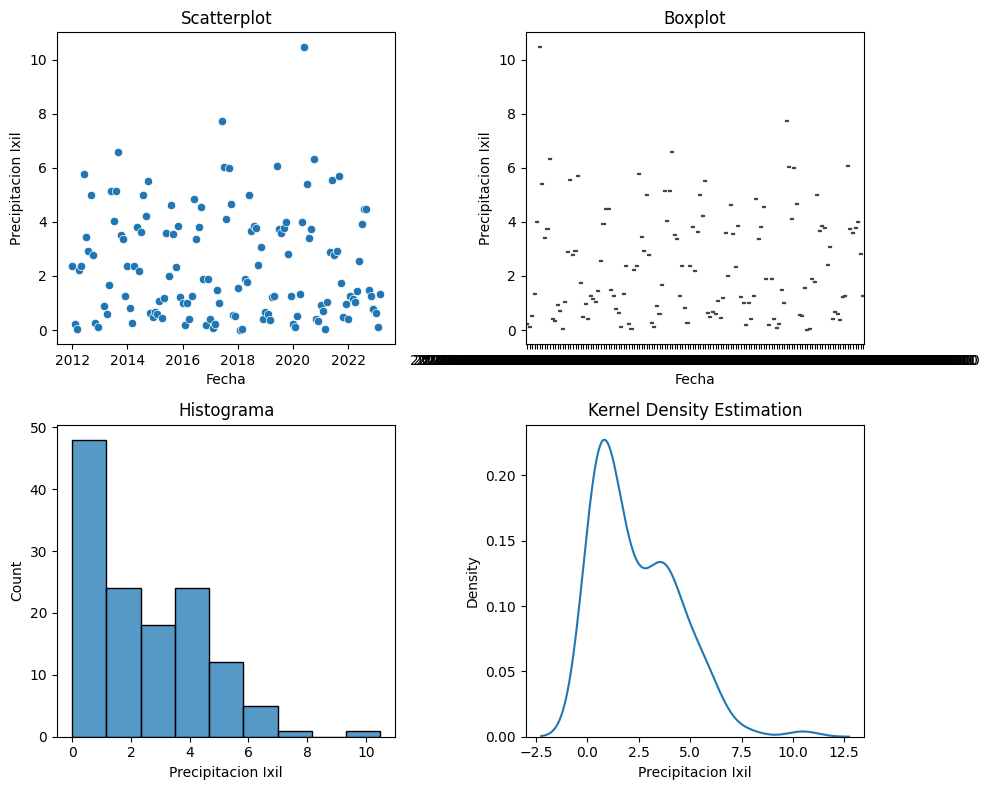

In [259]:
graficas_ixil(df_ixil)

<ipython-input-260-b20fd58883fd>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap=plt.cm.get_cmap('gist_rainbow')
<ipython-input-260-b20fd58883fd>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  m.plot(x0, y0, 'ok', markersize=5,color='w')


Text(0.5, 1.0, 'Precipitación')

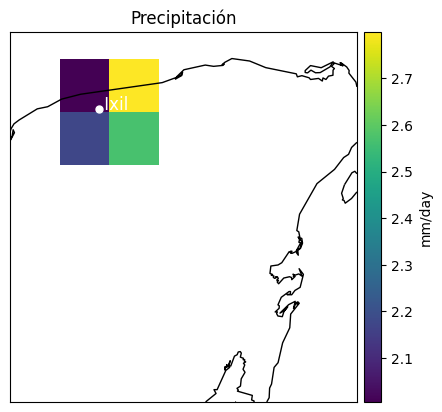

In [260]:
data =nn.data
unidad = nn.attrs['units']
lat = nn.coords['lat'].data
lon = nn.coords['lon'].data

m = Basemap(projection='merc',llcrnrlat=18.375,urcrnrlat=21.875,\
            llcrnrlon=-90.375,urcrnrlon=-86.875,lat_ts=10,resolution = 'i')
m.drawcoastlines()
my_cmap=plt.cm.get_cmap('gist_rainbow')
my_cmap.set_under('w')
x0, y0 = m(ix_lon, ix_lat)
x, y = m(lon, lat)
m.plot(x0, y0, 'ok', markersize=5,color='w')
m.pcolormesh(x,y, data)
#m.text(x0, y0, ' Ixil', fontsize=12);
cb = m.colorbar()
cb.set_label(unidad)
plt.text(x0, y0, ' Ixil', fontsize=12, color='w');
plt.title('Precipitación')

In [261]:
ix_x=ds.where((ds.coords['lat']>= (ix_lat-.25)) & (ds.coords['lat']<= (ix_lat+.25)) & (ds.coords['lon']>= (ix_lon-.25 )) & (ds.coords['lon']<= (ix_lon+.25)))

In [262]:
print(ix_lon-.25 ,ix_lon+.25)

-89.7322 -89.2322


In [263]:
ix_x.where(ix_x != 0)

<xarray.Dataset>
Dimensions:                          (lat: 15, lon: 15, latv: 2, lonv: 2)
Coordinates:
  * lat                              (lat) float64 18.38 18.62 ... 21.62 21.88
  * lon                              (lon) float32 -90.38 -90.12 ... -86.88
Dimensions without coordinates: latv, lonv
Data variables:
    TRMM_3B42_Daily_7_precipitation  (lat, lon) float32 nan nan nan ... nan nan
    lat_bnds                         (lat, latv, lon) float64 nan nan ... nan
    lon_bnds                         (lon, lonv, lat) float64 nan nan ... nan
Attributes:
    NCO:                       netCDF Operators version 5.0.6 (Homepage = htt...
    nco_openmp_thread_number:  1
    Conventions:               CF-1.4
    start_time:                2012-01-01T01:30:00Z
    end_time:                  2012-02-01T01:29:59Z
    history:                   Fri Nov 24 15:18:48 2023: ncks -O -x -v time_b...
    userstartdate:             2012-01-01T00:00:00Z
    userenddate:               2012-01-31T23:59:59Z
    title:                     Time Averaged Map of Precipitation Rate daily ...
    plot_hint_title:           Time Averaged Map of Precipitation Rate daily ...
    plot_hint_subtitle:        over 2012-01-01 01:30Z - 2012-02-01 01:29Z, Re...
    plot_hint_caption:         - Selected date range was 2012-01-01 - 2012-01...